In [11]:
import pandas as pd
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\hempe\Studium\Real_Project\Project_repo\data\processed\df_train_processed.csv')

# Define features and target
X = df.drop(columns=['tm_c'])
y = df['tm_c']   

# Initialize model (no feature scaling for Gradient Boosting)
model = GradientBoostingRegressor(random_state=42)


# Parameter-Raster für Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# GridSearch mit 5-facher Cross-Validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # für Regression
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Führe GridSearchCV direkt auf den gesamten Datensatz aus (CV sorgt für valide Auswertung)
grid_search.fit(X, y)

# Ergebnisse
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE (CV): 2.268019512533066


Average RMSE: 2.27 ± 0.22
Average R²: 0.96 ± 0.01


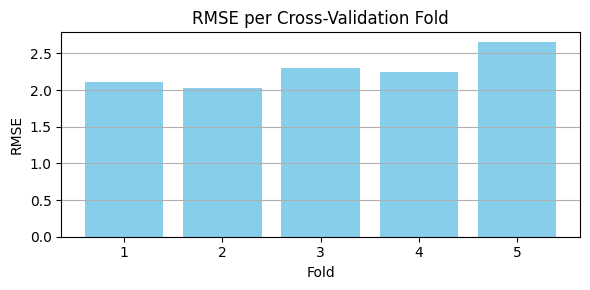

In [12]:
# Neues Modell mit besten Parametern
optimized_model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 200, subsample= 0.8, random_state=42)

# Perform 5-fold cross-validation
cv = cross_validate(optimized_model, X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))
 
# Convert scores to positive RMSE
rmse_scores = -cv['test_neg_root_mean_squared_error']
r2_scores = cv['test_r2']

# Print mean and std
print(f"Average RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"Average R²: {r2_scores.mean():.2f} ± {r2_scores.std():.2f}")

# Create DataFrame for plotting
rmse_df = pd.DataFrame({
    'Fold': range(1, 6),
    'RMSE': rmse_scores
})

# Plot RMSE per fold
plt.figure(figsize=(6, 3))
plt.bar(rmse_df['Fold'], rmse_df['RMSE'], color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE per Cross-Validation Fold')
plt.xticks(rmse_df['Fold'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()